   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.0000

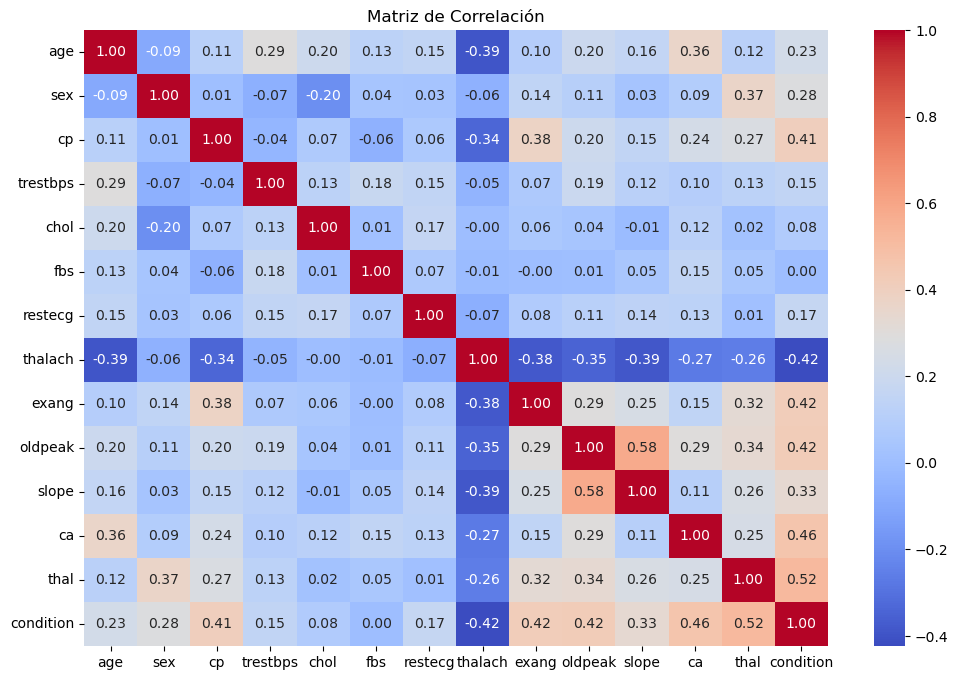

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("C:\\Users\\Javier Alexander Gar\\Downloads\\Mosquera tareas\\ANÁLISIS DE DATOS\\Tarea 3\\DatasetHeartDiseaseClevelandUCI\\heart_cleveland_upload.csv")

# Ver las primeras filas
print(df.head())

# Descripción estadística
print(df.describe())

# Información del dataset
print(df.info())

# Análisis de valores nulos
print(df.isnull().sum())

# Correlación entre las variables
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [5]:
# Tratamiento de valores faltantes (si es necesario)
df.fillna(df.mean(), inplace=True)  # Llenar valores nulos con la media de cada columna

# Convertir columnas categóricas a variables dummy (si es necesario)
df = pd.get_dummies(df, drop_first=True)

# Verificación después del preprocesamiento
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [9]:
# Usar la correlación para seleccionar las características más relevantes
# Elimina las columnas con baja correlación con la variable objetivo
X = df.drop(columns=['condition'])  # 'target' es la columna objetivo
y = df['condition']

# Selección de características: podemos usar un modelo de árbol o RandomForestClassifier para esto
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Importancia de las características
feature_importances = model.feature_importances_
features = X.columns

# Mostrar las características más importantes
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

age: 0.0904
sex: 0.0326
cp: 0.1211
trestbps: 0.0771
chol: 0.0827
fbs: 0.0099
restecg: 0.0209
thalach: 0.1154
exang: 0.0547
oldpeak: 0.1155
slope: 0.0453
ca: 0.1111
thal: 0.1233


In [11]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver el tamaño de los conjuntos
print(f"Tamaño entrenamiento: {X_train.shape[0]}, Tamaño prueba: {X_test.shape[0]}")

Tamaño entrenamiento: 237, Tamaño prueba: 60


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
log_reg = LogisticRegression()

# Entrenar el modelo
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

Precisión: 0.7333
Precisión (Precision): 0.7000
Recall: 0.7500
F1-score: 0.7241


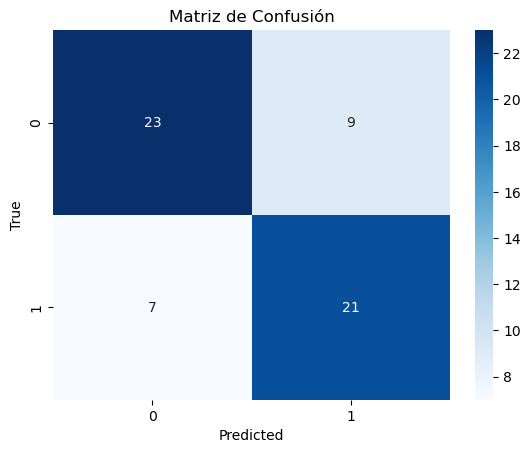

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predecir en el conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)

# Evaluación de las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

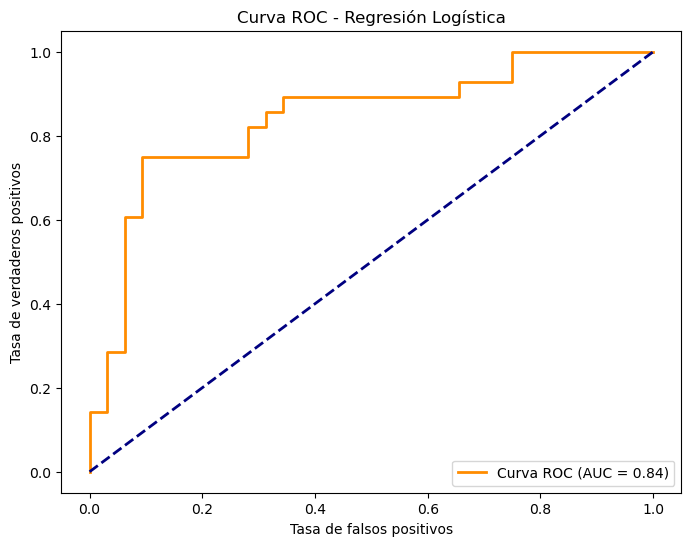

In [14]:
from sklearn.metrics import roc_curve, auc

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Coeficientes del modelo de regresión logística
coef = log_reg.coef_[0]
intercept = log_reg.intercept_

print(f"Coeficientes: {coef}")
print(f"Intercepto: {intercept}")

Coeficientes: [-0.09913696  0.87454491  0.35273993  0.5288346   0.35375893 -0.39283778
  0.26181975 -0.75047319  0.3498424   0.49881462  0.27871326  1.17840837
  0.74439573]
Intercepto: [-0.036211]


In [ ]:
# El modelo desarrollado para predecir la presencia de enfermedad cardíaca tiene un desempeño sólido con un AUC de 0.84, lo que indica una 
# buena capacidad para distinguir entre pacientes con y sin la enfermedad. Con una precisión del 73.33%, el modelo muestra un buen equilibrio 
# entre identificar correctamente los casos positivos (recall de 75%) y evitar falsos positivos (precision de 70%). Aunque presenta un rendimiento
# prometedor, es recomendable realizar más validaciones con conjuntos de datos externos y explorar ajustes adicionales en los parámetros del modelo 
# para mejorar su desempeño y aplicabilidad clínica.